<a href="https://colab.research.google.com/github/sheylaxiomaramo/Sql1-clases/blob/main/M%C3%B3dulo_4_Consultas_B%C3%A1sicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

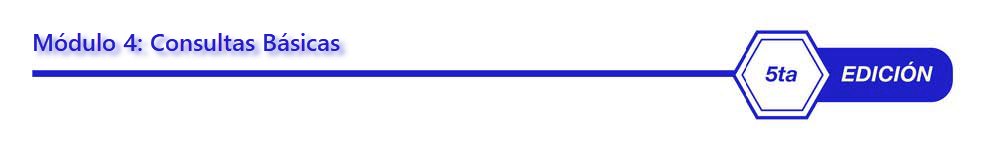

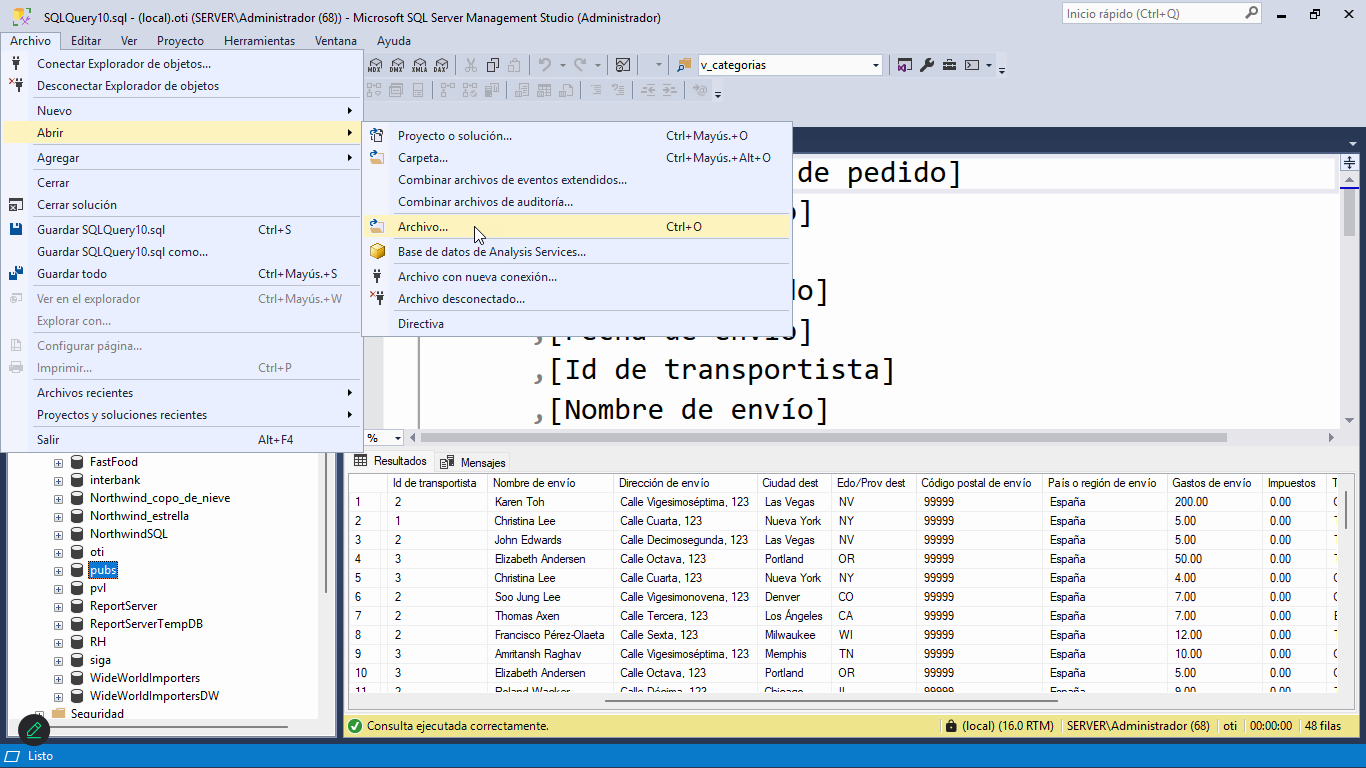

<table border=1 width='99%'>
<tr>
<td bgcolor='#B00A0F'>

# **<font color="#FFFFFF"> Sentencias básicas: SELECT, FROM, WHERE</font>**
</td>
</tr>
</table>

>* Usar SELECT * te devuelve todas las columnas de la tabla



```
USE pvl
GO
-- * Muestra todos los campos de una tabla
SELECT *
FROM Beneficiario
GO
```



>* Si deseamos visualizar algunos de los campos de las tabla. Deberás colocar los nombres del encabezado de la tabla separados por comas de la siguiente forma:



```
USE pvl
GO
SELECT
	cod_ben_in,
	pat_ben_vc,
	mat_ben_vc,
	nom_ben_vc,
	dni_ben_ch,
	fec_nac_ben_da,
	cod_sex_bi
FROM Beneficiario
GO
```



<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> Uso de los Alias</font>**
</td>
</tr>
</table>

Los alias en SQL son nombres temporales que se asignan a tablas o columnas en una consulta para facilitar su referencia.

Se utilizan principalmente en la sentencia SELECT.

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> Alias en las tablas </font>**
</td>
</tr>
</table>



```
USE pvl
GO
SELECT
	B.cod_ben_in,
	B.pat_ben_vc,
	B.mat_ben_vc,
	B.nom_ben_vc,
	B.dni_ben_ch,
	B.fec_nac_ben_da,
	B.cod_sex_bi
FROM Beneficiario AS B
GO
```





```
USE pvl
GO
SELECT
	B.cod_ben_in,
	B.pat_ben_vc,
	B.mat_ben_vc,
	B.nom_ben_vc,
	B.dni_ben_ch,
	B.fec_nac_ben_da,
	B.cod_sex_bi
FROM Beneficiario B
GO
```



<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> Alias en las columnas </font>**
</td>
</tr>
</table>



```
USE pvl
GO
SELECT
	cod_ben_in AS CÓDIGO,
	pat_ben_vc [APELLIDO PATERNO],
	mat_ben_vc 'APELLIDO MATERNO',
	nom_ben_vc NOMBRES,
	DNI = dni_ben_ch,
	[FECHA DE NACIMIENTO] = fec_nac_ben_da,
	'SEXO DEL BENEFICIARIO' = cod_sex_bi
FROM Beneficiario
GO
```



<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> FORMATO PERUANO dd/mm/aaaa </font>**
</td>
</tr>
</table>



```
USE pvl
GO
-- FORMATO: 0..14 El año tiene los 2 últimos digito
-- FORMATO: 100..114 El año tiene los 4 digito
SELECT
	cod_ben_in AS CÓDIGO,
	pat_ben_vc AS PATERNO,
	mat_ben_vc AS MATERNO,
	nom_ben_vc AS NOMBRES,
	dni_ben_ch AS DNI,
	CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	cod_sex_bi AS SEXO
FROM Beneficiario
GO
```





```
-- Formato de fechas
-- 0..14 El año se muestra con las dos últimas cifras
--SELECT GetDate()
--SELECT CONVERT(VARCHAR(200), GetDate(), 0)
--SELECT CONVERT(VARCHAR(200), GetDate(), 1)
--SELECT CONVERT(VARCHAR(200), GetDate(), 2)
SELECT CONVERT(VARCHAR(200), GetDate(), 3)
SELECT CONVERT(VARCHAR(200), GetDate(), 8)
SELECT CONVERT(VARCHAR(200), GetDate(), 14)
```





```
-- Formato de fechas
-- 100..114 El año se muestra con 4 cifras
SELECT GetDate()
--SELECT CONVERT(VARCHAR(200), GetDate(), 100)
--SELECT CONVERT(VARCHAR(200), GetDate(), 101)
--SELECT CONVERT(VARCHAR(200), GetDate(), 102)
SELECT CONVERT(VARCHAR(200), GetDate(), 103)
SELECT CONVERT(VARCHAR(200), GetDate(), 108)
SELECT CONVERT(VARCHAR(200), GetDate(), 114)
SELECT CONVERT(VARCHAR(200), GetDate(), 120)
SELECT CONVERT(VARCHAR(200), GetDate(), 121)
```





```
-- Formato personalizado
SELECT
'OTI, ' +
DATENAME(WEEKDAY, GETDATE()) + ' ' +
LTRIM(DAY(GETDATE())) + ' de ' +
DATENAME(MONTH, GETDATE()) + ' del ' +
LTRIM(YEAR(GETDATE())) AS [Fecha Personalizada]
```





```
-- Formato personalizado
SELECT
CONCAT
(
	'OTI, ',
	DATENAME(WEEKDAY, GETDATE()), SPACE(1),
	DAY(GETDATE()),
	' de ',
	DATENAME(MONTH, GETDATE()),
	' del ',
	YEAR(GETDATE())
) AS [Fecha Personalizada]
```



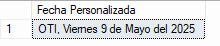



```
-- Formato personalizado
SELECT
CONCAT
(
	'OTI, ',
	CASE DATEPART(WEEKDAY,GETDATE())
		WHEN 1 THEN 'Lunes'
		WHEN 2 THEN 'Martes'
		WHEN 3 THEN 'Miércoles'
		WHEN 4 THEN 'Jueves'
		WHEN 5 THEN 'Viernes'
		WHEN 6 THEN 'Sábado'
		WHEN 7 THEN 'Domingo'
	END,
	SPACE(1),
	DAY(GETDATE()),
	' de ',
	DATENAME(MONTH, GETDATE()),
	' del ',
	YEAR(GETDATE())
) AS [Fecha Personalizada]
```





```
-- Formato personalizado
SELECT
CONCAT
(
	'OTI, ',
	CASE DATEPART(WEEKDAY,GETDATE())
		WHEN 1 THEN 'Lunes'
		WHEN 2 THEN 'Martes'
		WHEN 3 THEN 'Miércoles'
		WHEN 4 THEN 'Jueves'
		WHEN 5 THEN 'Viernes'
		WHEN 6 THEN 'Sábado'
		WHEN 7 THEN 'Domingo'
	END,
	SPACE(1),
	DAY(GETDATE()),
	' de ',
	CASE MONTH(GETDATE())
		WHEN 1 THEN 'Enero'
		WHEN 2 THEN 'Febrero'
		WHEN 3 THEN 'Marzo'
		WHEN 4 THEN 'Abril'
		WHEN 5 THEN 'Mayo'
		WHEN 6 THEN 'Junio'
	END,
	' del ',
	YEAR(GETDATE())
) AS [Fecha Personalizada]
```



<table width='99%'>
<tr>
<td bgcolor='#FFBA39'>

## **<font color="#000000"> WHERE</font>**
</td>
</tr>
</table>

La cláusula **WHERE** se utiliza para filtrar registros en una consulta SQL, permitiendo que solo se devuelvan las filas que cumplen con una condición específica.

Es una parte fundamental de las consultas SELECT, UPDATE, y DELETE.

<table width='99%'>
<tr>
<td bgcolor='#B00A0F'>

### **<font color="#FFFFFF"> Operadores de relación o comparación </font>**
</td>
</tr>
</table>

| Operador | Descripción                    | Ejemplo                        |
|----------|--------------------------------|--------------------------------|
| `=`      | Igual a                        | `column_name = value`         |
| `!=`     | Diferente de                  | `column_name != value`        |
| `<>`     | Diferente de                  | `column_name <> value`        |
| `<`      | Menor que                     | `column_name < value`         |
| `>`      | Mayor que                     | `column_name > value`         |
| `<=`     | Menor o igual que             | `column_name <= value`        |
| `>=`     | Mayor o igual que             | `column_name >= value`        |
| `BETWEEN`| Dentro de un rango            | `column_name BETWEEN value1 AND value2` |
| `LIKE`   | Coincidencia de patrones       | `column_name LIKE 'pattern%'` |
| `IN`     | Dentro de un conjunto de valores | `column_name IN (value1, value2, value3)` |



```
--Mostrar los beneficiarios que coincidan con su apellido paterno
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE pat_ben_vc = 'LUCHO'
GO
```



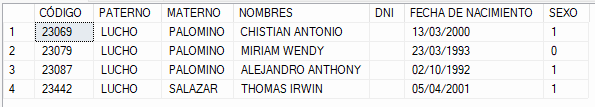



```
-- Mostrar los beneficiarios que han nacido el 06/06/2003
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE fec_nac_ben_da = '20030606'
GO
```





```
-- Mostrar los beneficiarios que han nacido el 06/06/2003
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE fec_nac_ben_da = '2003-06-06'
GO
```





```
-- Mostrar los beneficiarios que han nacido el 06/06/2003
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE CONVERT(CHAR(10), fec_nac_ben_da, 103) = '06/06/2003'
GO
```



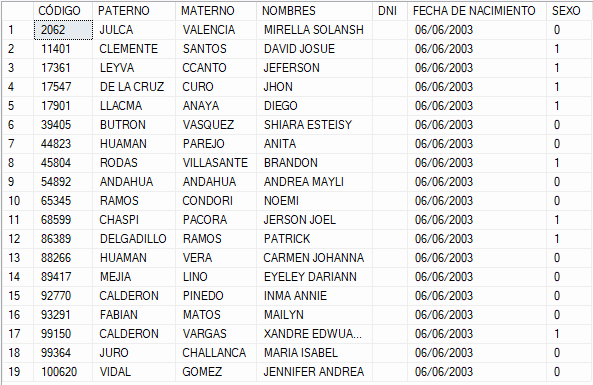



```
-- Mostrar los beneficiarios que tengan DNI
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE LEN(dni_ben_ch) = 8
GO
```



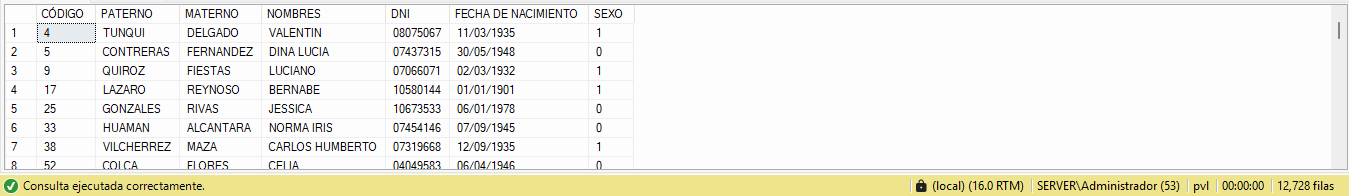



```
-- Mostrar los beneficiarios que tengan DNI VÁLIDO
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE dni_ben_ch LIKE ('[0-9][0-9][0-9][0-9][0-9][0-9][0-9][0-9]')
GO
```



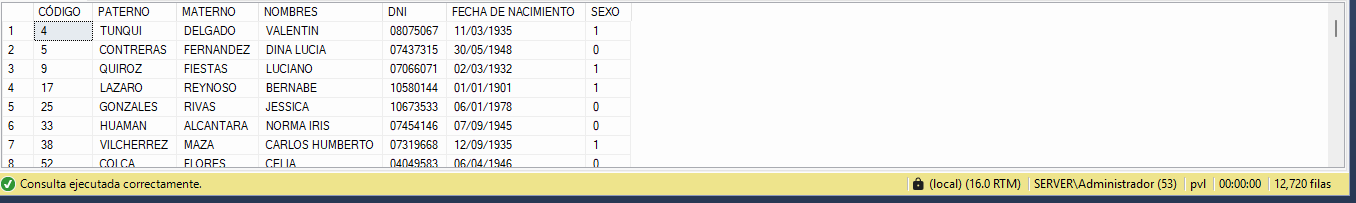



```
-- Mostrar todos los beneficiarios que tengan 6 años al 31/07/2004
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
    cod_sex_bi AS SEXO,
	DATEDIFF(DAY,fec_nac_ben_da,'20040731') AS DÍAS,
	DATEDIFF(DAY,fec_nac_ben_da,'20040731') / 365.256363004 AS AÑOS,
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'20040731') / 365.256363004) AS EDAD
FROM Beneficiario
GO
```





```
-- Mostrar todos los beneficiarios que tengan 6 años al 31/07/2004
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
    cod_sex_bi AS SEXO,
	DATEDIFF(DAY,fec_nac_ben_da,'20040731') AS DÍAS,
	DATEDIFF(DAY,fec_nac_ben_da,'20040731') / 365.256363004 AS AÑOS,
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'20040731') / 365.256363004) AS EDAD,
	DATEDIFF(YEAR,fec_nac_ben_da,'20040731') AS EDAD1
FROM Beneficiario
WHERE CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'20040731') / 365.256363004) <> DATEDIFF(YEAR,fec_nac_ben_da,'20040731')
GO
```





```
-- Mostrar todos los beneficiarios que tengan 6 años al 31/07/2004
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'20040731') / 365.256363004) AS EDAD,
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'20040731') / 365.256363004) = 6
GO
```





```
-- Mostrar todos los beneficiarios que tengan 6 años al 31/07/2004
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'2004-07-31') / 365.256363004) AS EDAD,
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'2004-07-31') / 365.256363004) = 6
GO
```





```
-- Mostrar todos los beneficiarios que tengan 6 años al 31/07/2004
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) = 6
GO
```



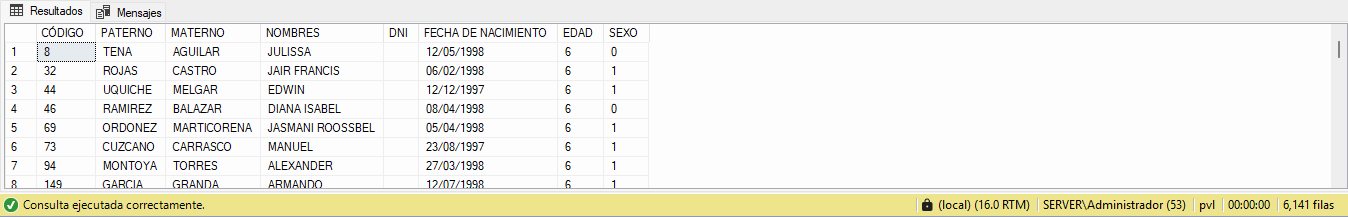



```
-- Northwind: Mostrar todos los pedidos que NO han sido entregados.
USE Northwind
GO
SELECT *
FROM Orders
WHERE ShippedDate IS NULL
```





```
-- Northwind: Mostrar todos los pedidos que han sido entregados.
USE Northwind
GO
SELECT *
FROM Orders
WHERE ShippedDate IS NOT NULL
```





```
-- Northwind: Mostrar todos los pedidos del año 1998.
USE Northwind
GO
SELECT *
FROM Orders
WHERE YEAR(OrderDate) = 1998
```





```
-- Northwind: Mostrar todos los pedidos que no son del año 1998.
USE Northwind
GO
SELECT *
FROM Orders
WHERE YEAR(OrderDate) != 1998
```





```
-- Northwind: Mostrar todos los pedidos que no son del año 1998.
USE Northwind
GO
SELECT *
FROM Orders
WHERE YEAR(OrderDate) <> 1998
```





```
-- Mostrar todos los beneficiarios cuya edad sea > 100 años
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) > 100
GO
```



```
-- Mostrar todos los beneficiarios que se inscribieron después del 31/07/2004
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) < 0
GO
```



```
-- Mostrar todos los beneficiarios que tengan el apellido paterno 'CARLOS', 'LUIS'
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE pat_ben_vc IN ('CARLOS', 'LUIS', 'LAURA', 'ADRIAN', 'SANTIAGO', 'RODRIGO')
ORDER BY pat_ben_vc
GO
```





```
-- Mostrar todos los beneficiarios que tengan el apellido paterno 'CARLOS', 'LUIS'
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    cod_sex_bi AS SEXO
FROM Beneficiario
WHERE
	pat_ben_vc = 'CARLOS'
	OR
	pat_ben_vc = 'LUIS'
	OR
	pat_ben_vc = 'LAURA'
	OR
	pat_ben_vc = 'ADRIAN'
	OR
	pat_ben_vc = 'SANTIAGO'
	OR
	pat_ben_vc = 'RODRIGO'
ORDER BY pat_ben_vc
GO
```



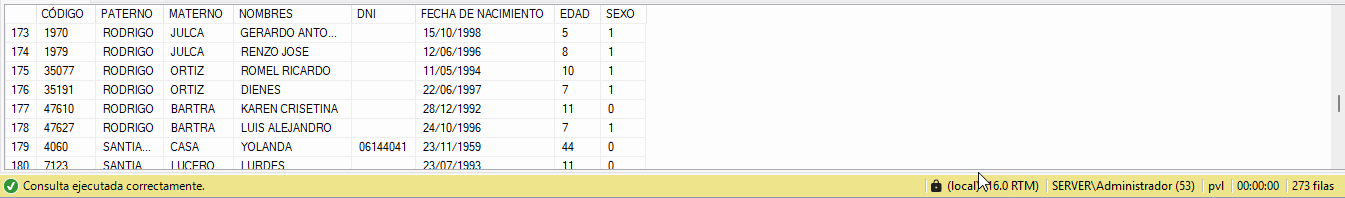



```
-- Mostrar todos los beneficiarios que tengan la edad de 1, 2, 3, 5, 8, 13
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    IIF(cod_sex_bi = 0, 'FEMENINO', 'MASCULINO') AS SEXO
FROM Beneficiario
WHERE
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004)
	IN (1, 2, 3, 5, 8, 13)
ORDER BY 7

```





```
-- Mostrar todos los beneficiarios que hallan nacido el
-- 31/12/2001, 31/12/2002, 31/12/2003
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    IIF(cod_sex_bi = 0, 'FEMENINO', 'MASCULINO') AS SEXO
FROM Beneficiario
WHERE
	fec_nac_ben_da IN ('20031231', '20021231', '20011231')
ORDER BY 5
```





```
-- Northwind: Mostrar todos los productos cuyo precio sean 10, 20, 30
USE Northwind
GO
SELECT *
FROM Products
WHERE UnitPrice IN (10, 20, 30)
ORDER BY 6
```





```
-- 0..14 El año se muestra en las 2 últimas cifras
-- 100..114 El año se muestra en las 4  cifras
SELECT CONVERT(VARCHAR(200), GetDate(), 103)
```





```
-- Northwind: Mostrar todos los productos cuyo precio sean de 10 hasta 30
USE Northwind
GO
SELECT *
FROM Products
WHERE UnitPrice BETWEEN 10 AND 30
ORDER BY 6
```





```
-- Northwind: Mostrar todos los productos cuyo precio sean de 10 hasta 30
USE Northwind
GO
SELECT *
FROM Products
WHERE
		UnitPrice >= 10
	AND
		UnitPrice <= 30
ORDER BY 6
```



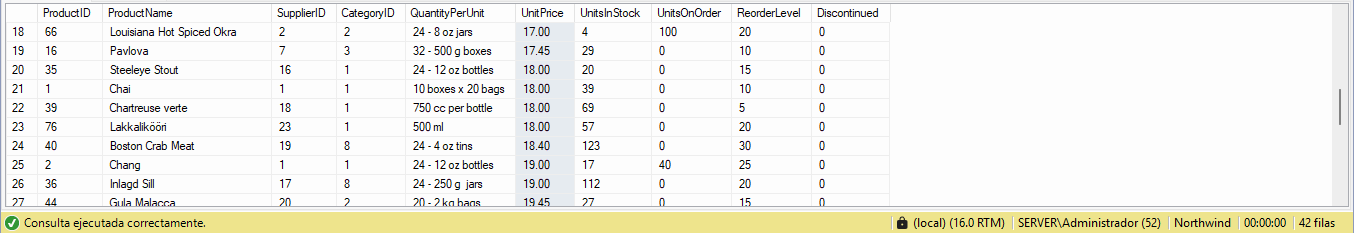



```
-- Mostrar todos los beneficiarios cuyo apellido comienzen con la letra Y
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    IIF(cod_sex_bi = 0, 'FEMENINO', 'MASCULINO') AS SEXO
FROM Beneficiario
WHERE pat_ben_vc LIKE 'Y%'
ORDER BY 2, 3, 4
GO
```





```
-- Mostrar todos los beneficiarios cuyo apellido comienzen con la letra X
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    IIF(cod_sex_bi = 0, 'FEMENINO', 'MASCULINO') AS SEXO
FROM Beneficiario
WHERE pat_ben_vc LIKE 'Y%'
ORDER BY 2, 3, 4
GO
```





```
-- Mostrar todos los beneficiarios cuyo apellido contengan la palabra 'AMOR'
USE pvl
GO
SELECT
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    IIF(cod_sex_bi = 0, 'FEMENINO', 'MASCULINO') AS SEXO
FROM Beneficiario
WHERE pat_ben_vc LIKE '%AMOR%'
ORDER BY 2, 3, 4
GO
```





```
-- Mostrar todos los beneficiarios cuyo apellido paterno que contengan la tercera letra 'Q'
USE pvl
GO
SELECT
	SUBSTRING(pat_ben_vc, 3, 1) AS Caracter,
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    IIF(cod_sex_bi = 0, 'FEMENINO', 'MASCULINO') AS SEXO
FROM Beneficiario
WHERE pat_ben_vc LIKE '__[Q]%'
ORDER BY 3, 4, 5
GO

```





```
-- Mostrar todos los beneficiarios cuyo apellido paterno que contengan la tercera letra 'Q' o 'B' o 'M'
USE pvl
GO
SELECT
	SUBSTRING(pat_ben_vc, 3, 1) AS Caracter,
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    IIF(cod_sex_bi = 0, 'FEMENINO', 'MASCULINO') AS SEXO
FROM Beneficiario
WHERE pat_ben_vc LIKE '__[QMB]%'
ORDER BY 1, 3, 4, 5
GO
```





```
-- Mostrar todos los beneficiarios cuyo apellido paterno contengan la tercera desde la letra M a R
USE pvl
GO
SELECT
	SUBSTRING(pat_ben_vc, 3, 1) AS Caracter,
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    IIF(cod_sex_bi = 0, 'FEMENINO', 'MASCULINO') AS SEXO
FROM Beneficiario
WHERE pat_ben_vc LIKE '__[M-R]%'
ORDER BY 1, 3, 4, 5
GO

```





```
USE PVL
GO
UPDATE Beneficiario
SET
	pat_ben_vc = REPLACE(pat_ben_vc, 'Ð', 'Ñ'),
	mat_ben_vc = REPLACE(mat_ben_vc, 'Ð', 'Ñ'),
	nom_ben_vc = REPLACE(nom_ben_vc, 'Ð', 'Ñ')
GO
```





```
-- Mostrar todos los beneficiarios cuyo apellido paterno contengan la tercera desde la letra M a R
USE pvl
GO
SELECT
	SUBSTRING(pat_ben_vc, 3, 1) AS Caracter,
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    IIF(cod_sex_bi = 0, 'FEMENINO', 'MASCULINO') AS SEXO
FROM Beneficiario
WHERE pat_ben_vc LIKE '__[M-R]%'
ORDER BY 1, 3, 4, 5
GO
```





```
-- Mostrar todos los beneficiarios cuyo apellido paterno
-- NO contengan la tercera desde la letra M a R
USE pvl
GO
SELECT
	SUBSTRING(pat_ben_vc, 3, 1) AS Caracter,
    cod_ben_in AS CÓDIGO,
    pat_ben_vc AS PATERNO,
    mat_ben_vc AS MATERNO,
    nom_ben_vc AS NOMBRES,
    dni_ben_ch AS DNI,
    CONVERT(CHAR(10), fec_nac_ben_da, 103) AS [FECHA DE NACIMIENTO],
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,CONVERT(CHAR(10),'31/07/2004', 103)) / 365.256363004) AS EDAD,
    IIF(cod_sex_bi = 0, 'FEMENINO', 'MASCULINO') AS SEXO
FROM Beneficiario
WHERE pat_ben_vc LIKE '__[^M-R]%'
ORDER BY 1, 3, 4, 5
GO
```

